In [76]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [77]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [78]:
x_train.shape

(50000, 32, 32, 3)

In [79]:
x_test.shape

(10000, 32, 32, 3)

In [80]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [81]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [82]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [83]:
classes[1]

'automobile'

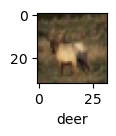

In [84]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,0.9))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
plot_sample(x_train,y_train,3)

In [85]:
# normalizing arrays
x_train=x_train/255
x_test=x_test/255

# modeling and training

In [86]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer="SGD",
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

C:\Users\hpw\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3052 - loss: 1.9309
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4188 - loss: 1.6487
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.4544 - loss: 1.5497
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.4730 - loss: 1.4985
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4977 - loss: 1.4309


In [87]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4591 - loss: 1.5250


[1.5278555154800415, 0.453000009059906]

In [88]:
#classification report
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

classification_report(y_test,y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


'              precision    recall  f1-score   support\n\n           0       0.56      0.54      0.55      1000\n           1       0.57      0.56      0.56      1000\n           2       0.37      0.36      0.36      1000\n           3       0.42      0.18      0.25      1000\n           4       0.65      0.14      0.23      1000\n           5       0.41      0.39      0.40      1000\n           6       0.45      0.67      0.53      1000\n           7       0.52      0.58      0.55      1000\n           8       0.78      0.34      0.47      1000\n           9       0.32      0.78      0.46      1000\n\n    accuracy                           0.45     10000\n   macro avg       0.50      0.45      0.44     10000\nweighted avg       0.50      0.45      0.44     10000\n'

In [89]:
cnn=models.Sequential([
    #cnn layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer="adam",
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

C:\Users\hpw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3814 - loss: 1.7087
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5625 - loss: 1.2306
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6196 - loss: 1.0854
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6566 - loss: 0.9912
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6760 - loss: 0.9288
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6993 - loss: 0.8699
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7085 - loss: 0.8362
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7208 - loss: 0.7988
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7317 - loss: 0.7623
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7447 - loss: 0.7355


In [90]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6764 - loss: 0.9716


[0.9832515716552734, 0.6721000075340271]

In [91]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

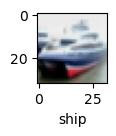

In [92]:
plot_sample(x_test,y_test,1)

In [93]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[4.91601136e-03, 5.77222381e-05, 1.67003963e-02, 8.45916331e-01,
        3.87215894e-03, 8.19267631e-02, 1.17598558e-02, 4.00262012e-04,
        3.43520381e-02, 9.84457583e-05],
       [2.82978594e-01, 1.65365204e-01, 4.94089818e-06, 1.11704026e-07,
        4.18085762e-07, 1.16254095e-09, 8.36337435e-08, 9.66166809e-08,
        5.41028321e-01, 1.06222974e-02],
       [7.26489127e-02, 4.83526997e-02, 1.36009930e-03, 7.51829473e-04,
        1.86719443e-03, 2.92810273e-05, 2.66496121e-04, 3.04703048e-04,
        8.64641905e-01, 9.77693219e-03],
       [5.42555809e-01, 2.36919522e-02, 2.85415612e-02, 1.97340618e-03,
        8.64693336e-03, 4.17669071e-05, 1.71283819e-03, 3.55880875e-05,
        3.89426649e-01, 3.37346713e-03],
       [1.14211653e-05, 2.40323297e-05, 8.60194787e-02, 9.37383994e-03,
        6.45878732e-01, 5.73342899e-04, 2.57950306e-01, 2.91431479e-05,
        1.34849552e-05, 1.26302621e-04]], dtype=float32)

In [94]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

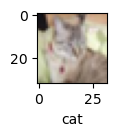

In [95]:
plot_sample(x_test,y_test,8)

In [96]:
classes=[y_classes[8]]
print("classes",classes)

classes [3]
